In [1]:
import json
import numpy as np
from datetime import datetime

import pandas as pd
import seaborn as sns

In [87]:
filename = "./mnist_experiments.json"
with open(filename, "r") as f:
    raw_experiments = json.load(f)


def convert_to_df(raw_experiments):
    def convert_entry(v):
        return {
            "Init. param scale": v[0][0],
            "Learning rate": v[0][1],
            "Num epochs": v[0][2],
            "Autoscale": v[0][3],
            "Training dtype": v[0][4],
            "Test dtype": v[0][5],
            "Training acc.": v[1][0],
            "Test acc.": v[1][1],
        }
    data = [convert_entry(v) for v in raw_experiments]
    df = pd.DataFrame(data)
    return df

In [88]:
df_experiments = convert_to_df(raw_experiments) 
df_experiments
# df_experiments["Step size"] 

,Init. param scale,Learning rate,Num epochs,Autoscale,Training dtype,Test dtype,Training acc.,Test acc.
0,1.0,0.0010,10,True,float16,float32,0.969833,0.9396
1,1.0,0.0020,10,True,float16,float32,0.985217,0.9462
2,1.0,0.0040,10,True,float16,float32,0.996567,0.9516
3,1.0,0.0080,10,True,float16,float32,0.998717,0.9507
4,1.0,0.0160,10,True,float16,float32,0.998817,0.9509
5,1.0,0.0005,10,True,float16,float32,0.937717,0.9183
6,0.5,0.0010,10,True,float16,float32,0.937800,0.9175
7,1.0,0.0010,10,True,float16,float32,0.969833,0.9396
8,2.0,0.0010,10,True,float16,float32,0.988583,0.9486
9,4.0,0.0010,10,True,float16,float32,0.994533,0.9510


In [89]:
def filter_init_scale_exp(df, autoscale: bool, training_dtype: str):
    mask = df["Learning rate"] == 0.001
    mask &= df["Autoscale"] == autoscale
    mask &= df["Training dtype"] == training_dtype
    df = df[mask]
    # df.set_index(np.arange(len(df)), inplace=True)
    df.set_index(df["Init. param scale"], inplace=True)
    df = df.sort_index().drop_duplicates()
    df = df[["Training acc.", "Test acc."]]
    
    suffix = training_dtype
    suffix += " AutoScale" if autoscale else " Normal"
    df = df.rename(columns={"Training acc.": "Train acc. " + suffix, "Test acc.": "Test acc. "+ suffix})
    return df


df_fp16_autoscale_exp = filter_init_scale_exp(df_experiments, True, "float16")
df_fp16_noscale_exp = filter_init_scale_exp(df_experiments, False, "float16")
df_fp32_noscale_exp = filter_init_scale_exp(df_experiments, False, "float32")


In [90]:
df_fp16_autoscale_exp

,Train acc. float16 AutoScale,Test acc. float16 AutoScale
Init. param scale,,
0.5,0.937800,0.9175
1.0,0.969833,0.9396
2.0,0.988583,0.9486
4.0,0.994533,0.9510
8.0,0.999000,0.9533


In [91]:
df_scale_exp = pd.concat([df_fp16_autoscale_exp, df_fp16_noscale_exp, df_fp32_noscale_exp], axis=1)
df_scale_exp

,Train acc. float16 AutoScale,Test acc. float16 AutoScale,Train acc. float16 Normal,Test acc. float16 Normal,Train acc. float32 Normal,Test acc. float32 Normal
Init. param scale,,,,,,
0.5,0.937800,0.9175,0.937750,0.9178,0.953900,0.9296
1.0,0.969833,0.9396,0.968150,0.9383,0.971167,0.9407
2.0,0.988583,0.9486,0.098717,0.0980,0.990450,0.9489
4.0,0.994533,0.9510,0.098717,0.0980,0.996483,0.9497
8.0,0.999000,0.9533,0.098717,0.0980,0.998433,0.9527


In [114]:
palette = sns.color_palette("husl")
colors = [
    palette[0], palette[0],
    palette[2], palette[2],
    palette[4], palette[4],
]
palette

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

[(0.0, 1.05)]

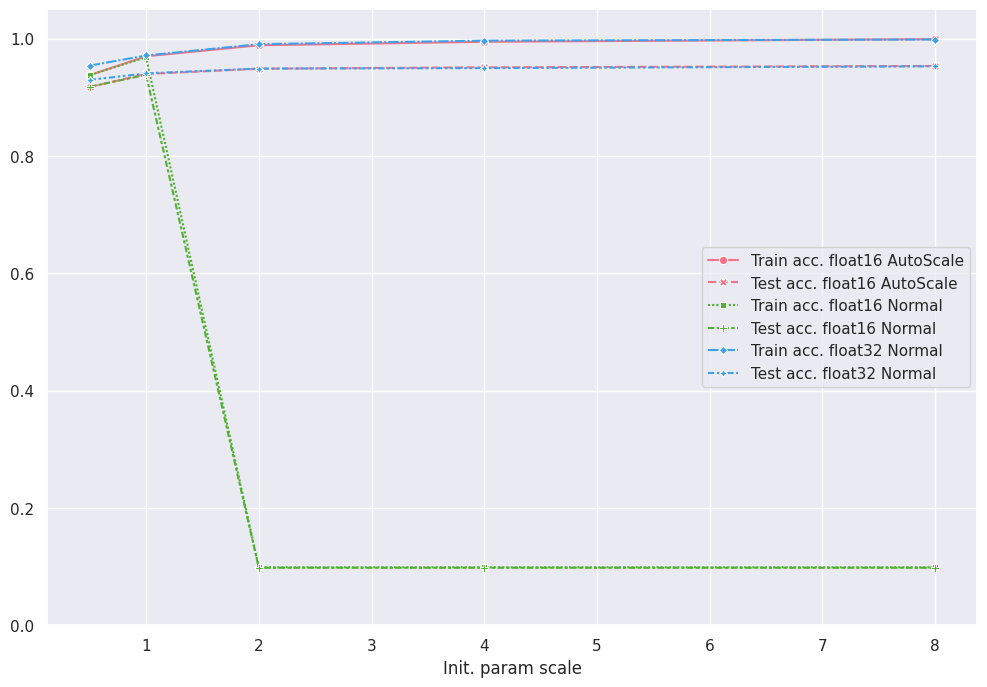

In [125]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,8)})
# sns.set_context("paper")

ax = sns.lineplot(data=df_scale_exp, palette=colors[:6], markers=True)
ax.set(ylim=(0, 1.05))
# ax = sns.lineplot(data=df_fp32_noscale_exp[["Training acc.", "Test acc."]])

In [116]:
def filter_learning_rate_exp(df, autoscale: bool, training_dtype: str):
    mask = df["Init. param scale"] == 1
    mask &= df["Autoscale"] == autoscale
    mask &= df["Training dtype"] == training_dtype
    df = df[mask]
    # df.set_index(np.arange(len(df)), inplace=True)
    df.set_index(df["Learning rate"], inplace=True)
    df = df.sort_index().drop_duplicates()
    df = df[["Training acc.", "Test acc."]]
    
    suffix = training_dtype
    suffix += " AutoScale" if autoscale else " Normal"
    df = df.rename(columns={"Training acc.": "Train acc. " + suffix, "Test acc.": "Test acc. "+ suffix})
    return df


df_fp16_autoscale_lrexp = filter_learning_rate_exp(df_experiments, True, "float16")
df_fp16_noscale_lrexp = filter_learning_rate_exp(df_experiments, False, "float16")
df_fp32_noscale_lrexp = filter_learning_rate_exp(df_experiments, False, "float32")

df_fp32_noscale_lrexp
# df_experiments

,Train acc. float32 Normal,Test acc. float32 Normal
Learning rate,,
0.0005,0.952150,0.9300
0.0010,0.971167,0.9407
0.0020,0.988667,0.9471
0.0040,0.995417,0.9505
0.0080,0.999200,0.9513
0.0160,0.998233,0.9510
0.0300,0.943250,0.8904


In [117]:
df_lr_exp = pd.concat([df_fp16_autoscale_lrexp, df_fp16_noscale_lrexp, df_fp32_noscale_lrexp], axis=1)
df_lr_exp.index = np.log10(df_lr_exp.index)

[(0.0, 1.05)]

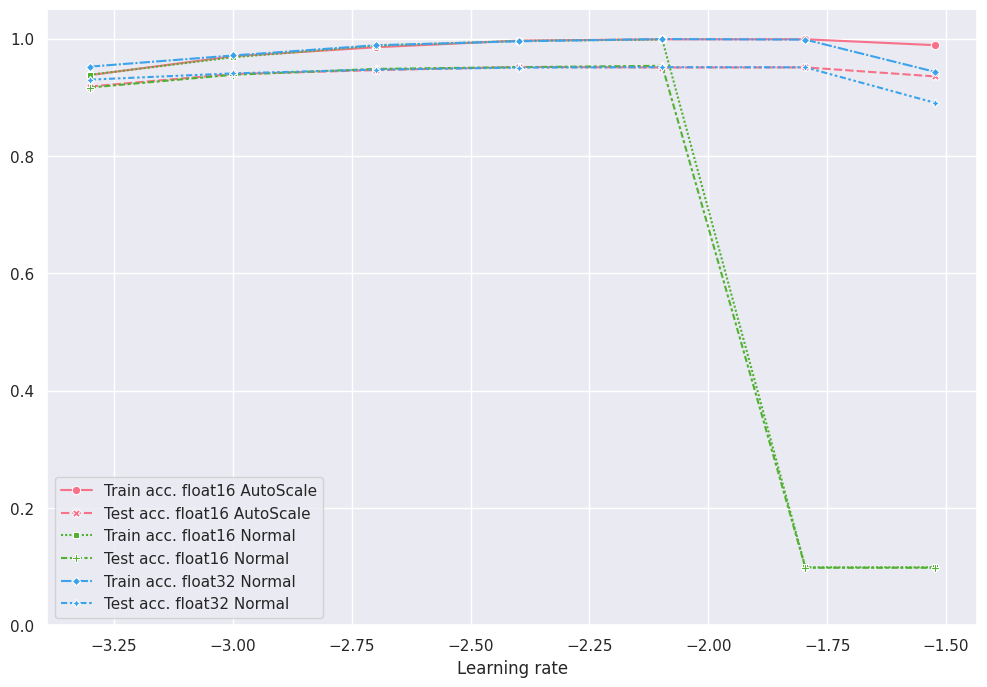

In [123]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.lineplot(data=df_lr_exp, palette=colors[:6], markers=True)
ax.set(ylim=(0, 1.05))

In [126]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [128]:
# np.log2(df_experiments["Learning rate"])